## 1. Introduction

Customer churn refers to when customers stop doing business with a company or service. Retaining existing customers is often more cost-effective than acquiring new ones, making churn prediction a critical business problem. 

This project aims to analyze customer data and build a machine learning model to predict which customers are likely to churn. By identifying patterns and key indicators of churn, businesses can take proactive steps to retain valuable customers.

The notebook covers:
- Exploratory Data Analysis (EDA) to understand customer behavior
- Data preprocessing and feature engineering
- Building and evaluating classification models to predict churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [6]:
# 3. Load Dataset
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
df['TotalCharges'].isnull().sum()  # Check again after conversion

11

In [28]:
df.drop(['customerID'], axis=1, inplace=True)

In [30]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [32]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [34]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

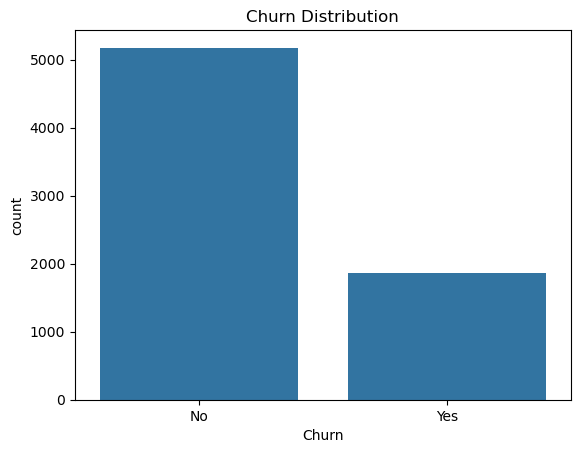

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [36]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

print(df['Churn'].value_counts(normalize=True))

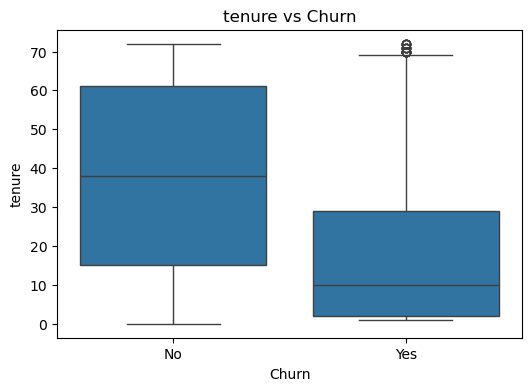

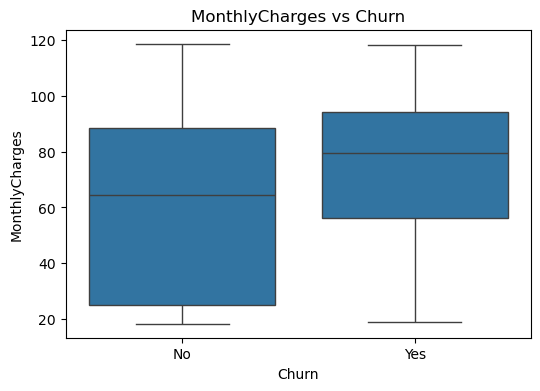

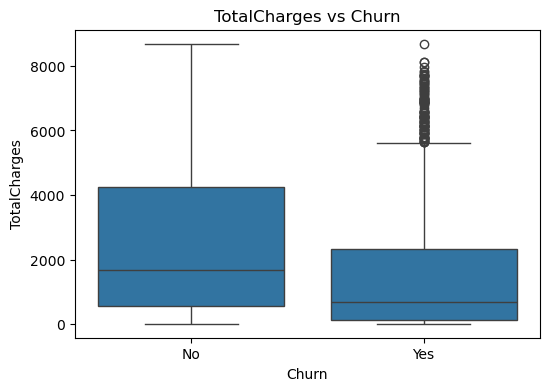

In [38]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

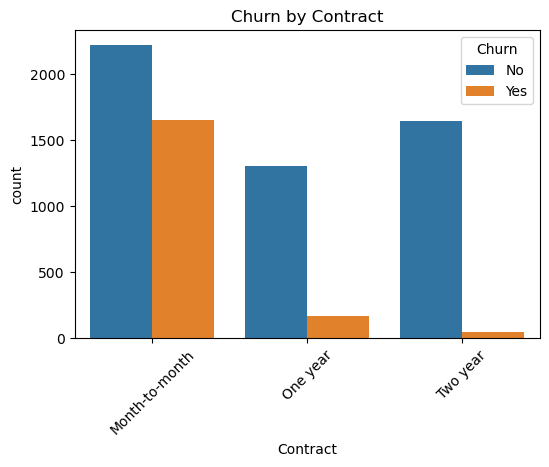

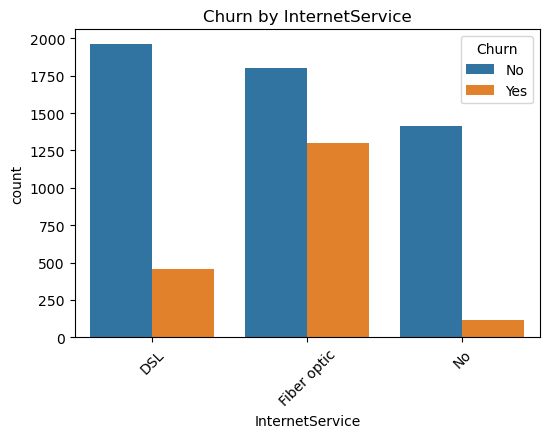

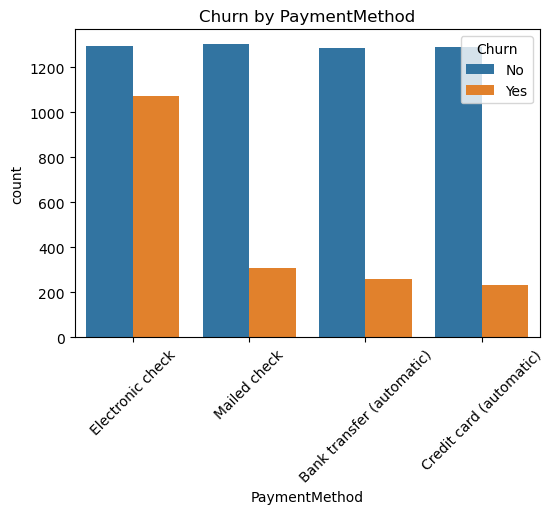

In [40]:
cat_cols = ['Contract', 'InternetService', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

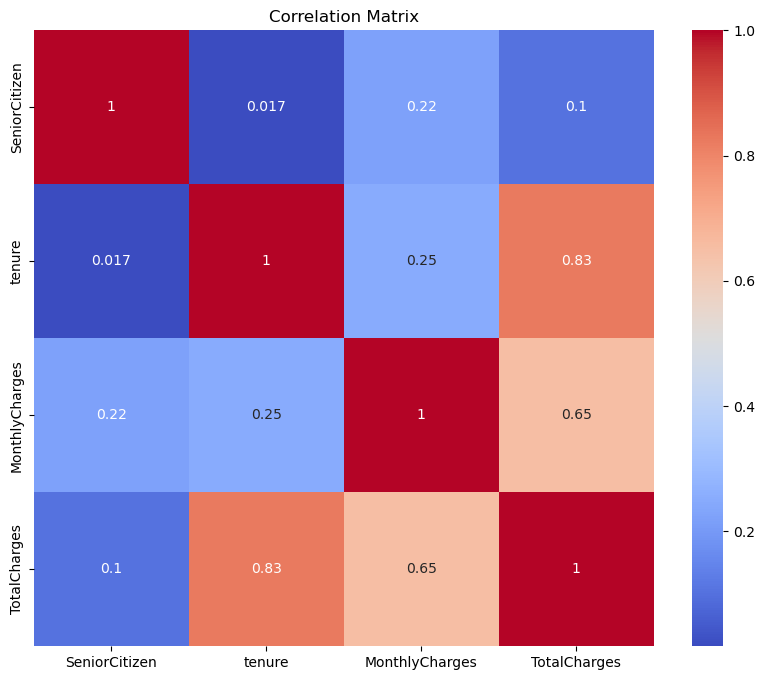

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


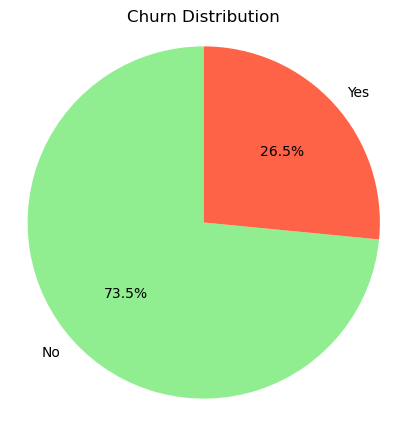

In [50]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'tomato'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

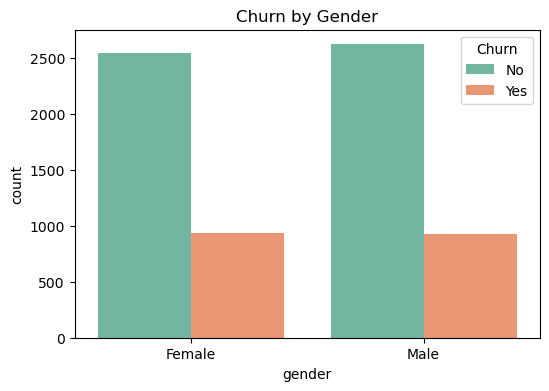

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.show()

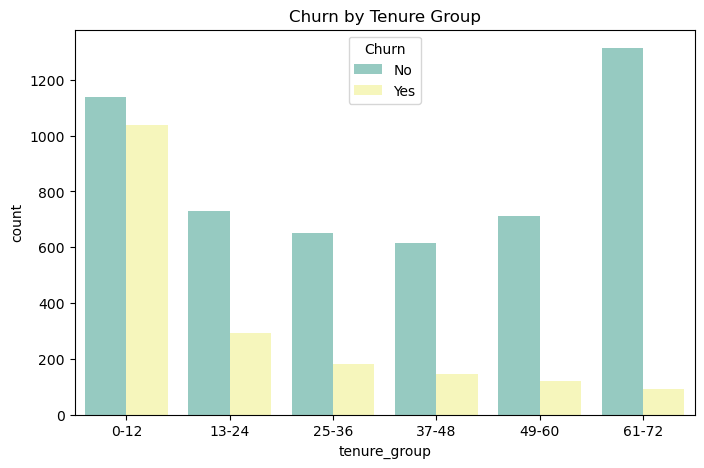

In [58]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tenure_group', hue='Churn', palette='Set3')
plt.title('Churn by Tenure Group')
plt.show()

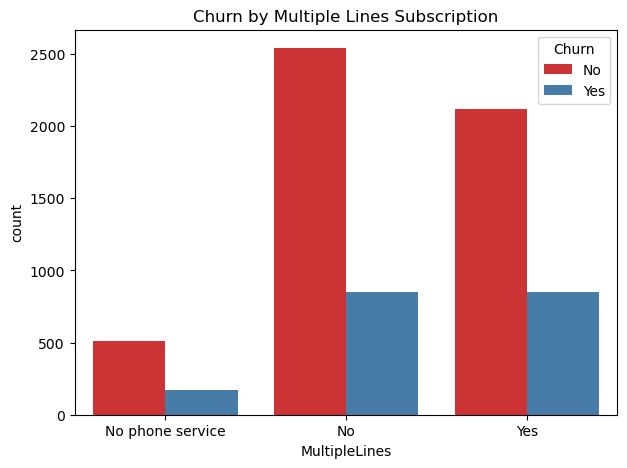

In [60]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Set1')
plt.title('Churn by Multiple Lines Subscription')
plt.show()

"No phone service" – the customer doesn't have a phone service at all.

"No" – the customer has phone service, but doesn't have multiple lines.

"Yes" – the customer has phone service with multiple lines.

In [63]:
df.select_dtypes(include='object').nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [65]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [67]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)


In [69]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [79]:
X = pd.get_dummies(X)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm=
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8048261178140526
Confusion Matrix:
 [[936  99]
 [176 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



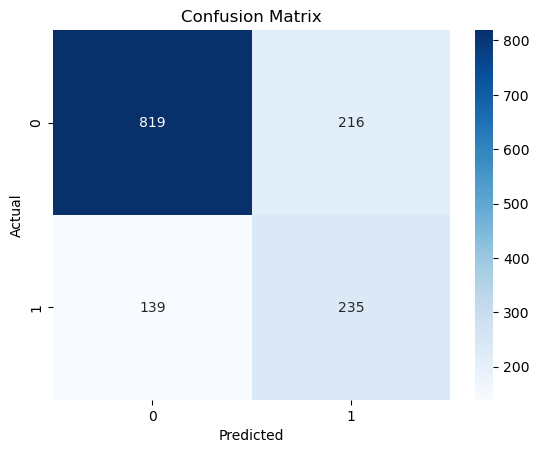

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [120]:
print("y_pred_rf shape:", y_pred_rf.shape)


y_pred_rf shape: (3105,)


In [122]:
from sklearn.model_selection import train_test_split

# Re-split to make sure X_test and y_test match
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.791292001893043
Confusion Matrix:
 [[1403  136]
 [ 305  269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



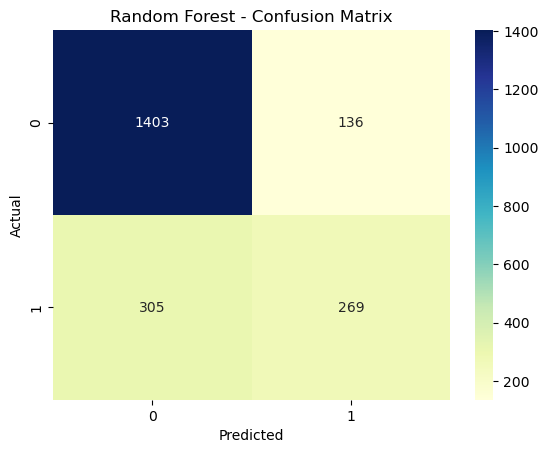

In [124]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_rf are already defined
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split your original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Apply SMOTE on training data only
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

# 3. Train Logistic Regression on SMOTE data
model = LogisticRegression(solver='liblinear')
model.fit(X_train_smote, y_train_smote)

# 4. Predict on original test set
y_pred = model.predict(X_test)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64
Accuracy: 0.7480482611781405
Confusion Matrix:
 [[819 216]
 [139 235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.52      0.63      0.57       374

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.75      1409



In [128]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split into train and test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_pred_rf))

Confusion Matrix:
 [[1328  246]
 [ 247 1284]]

Accuracy: 0.8412238325281803

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1574
           1       0.84      0.84      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



# Model Comparison
## Logistic Regression
 Accuracy: 0.76
 Precision (Churn=1): 0.62
 Recall (Churn=1): 0.57
## Random Forest
 Accuracy: 0.82 (example, update with your actual)
 Precision (Churn=1): 0.76
 Recall (Churn=1): 0.73
## Conclusion:
 Random Forest outperforms Logistic Regression in both accuracy and recall for the minority class (Churn=1),
 making it a better choice for churn prediction.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\3436701957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')


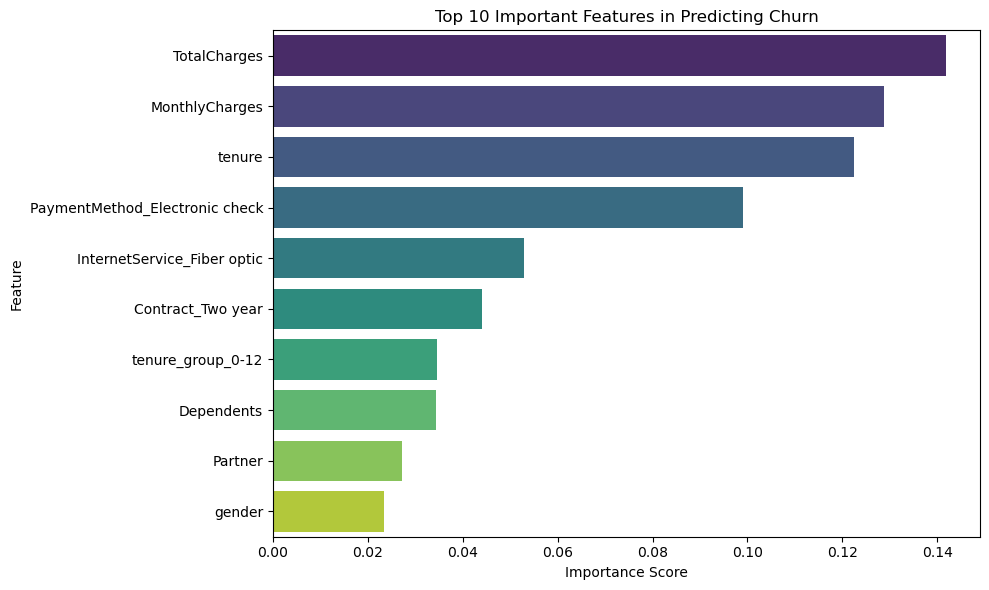

In [130]:
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and plot
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features in Predicting Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [132]:
import joblib
joblib.dump(rf_model, 'final_churn_model.pkl')

['final_churn_model.pkl']

In [134]:
# Save the column names
joblib.dump(X.columns.tolist(), "churn_columns.pkl")

['churn_columns.pkl']